# Vaccinations in the U.S.

### Introduction
In the United States, public health officials have been pushing Americans to get vaccinated in order prevent COVID-19 infection and to (hopefully) bring the epidemic in the United States to an end. This data will analyze the CDC data reporting on vaccinations as well as new COVID-19 cases and new COVID-19 deaths. 

#### Key insights revealed by the CDC’s dataset include:
- The pandemic in the United States occured in waves - with new case counts at an elevated level until now
- Vaccinations have made significant progress and made a noticeable impact on the pandemic
- Vaccinations have slowed but new cases and deaths have fallen at an accelerated pace
- The United States epidemic is slowing but is still not over (let alone the worldwide pandemic)

In [110]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vacc_total_state = pd.read_csv("covid19_vaccinations_in_the_united_states.csv", skiprows=2)

In [3]:
vacc_total_state.head(5)

,State/Territory/Federal Entity,Total Doses Delivered,Doses Delivered per 100K,18+ Doses Delivered per 100K,Total Doses Administered by State where Administered,Doses Administered per 100k by State where Administered,18+ Doses Administered by State where Administered,18+ Doses Administered per 100K by State where Administered,People with at least One Dose by State of Residence,Percent of Total Pop with at least One Dose by State of Residence,...,Percent of 12+ Pop with at least One Dose by State of Residence,People 12+ Fully Vaccinated by State of Residence,Percent of 12+ Pop Fully Vaccinated by State of Residence,People 12+ Fully Vaccinated_Moderna_Resident,People 12+ Fully Vaccinated_Pfizer_Resident,People 12+ Fully Vaccinated_Janssen_Resident,People 12+ Fully Vaccinated_Unknown 2-dose Manuf_Resident,12+ Doses Administered by State where Administered,Doses Administered per 100k of 12+ pop by State where Administered,Doses Delivered per 100k of 12+ pop
0,Alaska,805355,110090.0,146014.0,603860,82546.0,582908,105683.0,332524,45.5,...,54.5,283902,46.6,121987,143570,18317,28,603299,99084,132269
1,Alabama,4501400,91806.0,117996.0,3002607,61238.0,2974391,77968.0,1757607,35.8,...,42.0,1419582,33.9,646326,673671,99501,84,3002314,71708,107512
2,Arkansas,2744150,90932.0,118402.0,2041850,67660.0,2002261,86392.0,1174803,38.9,...,45.9,920496,36.0,426592,430318,63457,129,2039762,79764,107309
3,American Samoa,54030,97021.0,124387.0,41907,75252.0,40401,93011.0,23161,41.6,...,48.7,18901,39.7,4292,14575,34,0,41905,88115,113611
4,Arizona,7702125,105817.0,136599.0,5856464,80460.0,5711284,101291.0,3313198,45.5,...,53.4,2567608,41.4,1072602,1317474,176154,1378,5856047,94360,124107


In [4]:
vacc_total_state.columns

Index(['State/Territory/Federal Entity', 'Total Doses Delivered',
       'Doses Delivered per 100K', '18+ Doses Delivered per 100K',
       'Total Doses Administered by State where Administered',
       'Doses Administered per 100k by State where Administered',
       '18+ Doses Administered by State where Administered',
       '18+ Doses Administered per 100K by State where Administered',
       'People with at least One Dose by State of Residence',
       'Percent of Total Pop with at least One Dose by State of Residence',
       'People 18+ with at least One Dose by State of Residence',
       'Percent of 18+ Pop with at least One Dose by State of Residence',
       'People Fully Vaccinated by State of Residence',
       'Percent of Total Pop Fully Vaccinated by State of Residence',
       'People 18+ Fully Vaccinated by State of Residence',
       'Percent of 18+ Pop Fully Vaccinated by State of Residence',
       'Total Number of Pfizer doses delivered',
       'Total Number of Mo

In [5]:
vacc_time = pd.read_csv("trends_in_number_of_covid19_vaccinations_in_the_us.csv", skiprows=2)

In [6]:
vacc_time.head(5)

,Date Type,Date,Program,Total Doses Administered Daily,Daily Count People Receiving Dose 1,Daily Count People Receiving Dose 2,Total Doses Administered Cumulative,People Receiving 1 or More Doses Cumulative,People Receiving 2 Doses Cumulative,7-Day Avg Daily Count Dose 1,7-Day Avg Total Doses Daily,7-Day Avg Daily Count Dose 2,Total Doses Administered Daily Change,7-Day Avg Total Doses Administered Daily Change,Daily Count of People Fully Vaccinated,People with at least One Dose Cumulative,People Fully Vaccinated Cumulative,7-Day Avg Daily Count of People Fully Vaccinated
0,Admin,2020-12-13,US,12886.0,11361.0,1355.0,12886.0,11361.0,1355.0,11361.0,12886.0,1355.0,NaN,NaN,1464.0,11361.0,1464.0,1464.0
1,Report,2020-12-13,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,Admin,2020-12-13,LTC,229.0,229.0,0.0,229.0,229.0,0.0,229.0,229.0,0.0,NaN,NaN,0.0,229.0,0.0,0.0
3,Admin,2020-12-14,US,3866.0,3738.0,5.0,16752.0,15099.0,1360.0,7550.0,8376.0,680.0,NaN,NaN,31.0,15099.0,1495.0,747.0
4,Report,2020-12-14,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,509.0,255.0,NaN,NaN,NaN,NaN


In [ ]:
vacc_perday = vacc_time.loc[vacc_time['Date Type'] == 'Report'][['Date',
                                                                 'Total Doses Administered Daily Change',
                                                                 'Total Doses Administered Cumulative',
                                                                 'People Receiving 2 Doses Cumulative'
                                                                ]]

In [92]:
vacc_perday_chart = alt.Chart(vacc_time.loc[vacc_time['Date Type'] == 'Report'][['Date','Total Doses Administered Daily Change']]).mark_bar().encode(
    x=alt.X('Date:T'),
    y=alt.Y('Total Doses Administered Daily Change',axis=alt.Axis(title='Daily Vaccinations', titleColor='#5276A7'))
).properties(width=800)

In [27]:
np.unique(vacc_time.loc[vacc_time['Date Type'] == 'Report']['Total Doses Administered Daily Change'])

array([0.000000e+00, 5.090000e+02, 1.212900e+04, 3.899600e+04,
       6.199200e+04, 7.570800e+04, 1.268000e+05, 1.499570e+05,
       1.562200e+05, 1.564780e+05, 1.852790e+05, 1.875080e+05,
       1.897220e+05, 2.098530e+05, 2.394720e+05, 2.904020e+05,
       3.146770e+05, 3.361450e+05, 3.371140e+05, 3.384360e+05,
       3.681730e+05, 4.194400e+05, 4.345280e+05, 4.413180e+05,
       4.415490e+05, 5.168580e+05, 5.480500e+05, 5.584580e+05,
       5.732780e+05, 6.000550e+05, 6.211540e+05, 7.270950e+05,
       7.307000e+05, 7.885730e+05, 7.904840e+05, 8.067510e+05,
       8.546090e+05, 8.561090e+05, 8.704650e+05, 8.855880e+05,
       8.979720e+05, 9.562330e+05, 9.597940e+05, 9.874850e+05,
       9.888460e+05, 1.021093e+06, 1.061463e+06, 1.086840e+06,
       1.093867e+06, 1.097394e+06, 1.099103e+06, 1.111640e+06,
       1.123306e+06, 1.141043e+06, 1.170314e+06, 1.188734e+06,
       1.206680e+06, 1.310665e+06, 1.325456e+06, 1.376214e+06,
       1.404280e+06, 1.423432e+06, 1.430031e+06, 1.4328

In [93]:
vacc_perday_chart

alt.Chart(...)

In [9]:
cd_bystate = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

In [10]:
cd_bystate.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,07/28/2020,MP,40,40.0,0.0,0,0.0,2,2.0,0.0,0,0.0,07/29/2020 02:34:46 PM,Agree,Agree
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,08/22/2020,AR,56199,NaN,NaN,547,0.0,674,NaN,NaN,11,0.0,08/23/2020 02:15:28 PM,Not agree,Not agree
4,10/22/2020,MP,88,88.0,0.0,0,0.0,2,2.0,0.0,0,0.0,10/23/2020 01:44:31 PM,Agree,Agree


In [125]:
total_case_time = cd_bystate.groupby('submission_date')[['tot_cases', 'new_case', 'new_death']].sum().reset_index()

In [131]:
total_case_time.head()

,submission_date,tot_cases,new_case,new_death
0,01/01/2021,20582347,153921,2862
1,01/02/2021,20824023,241676,2726
2,01/03/2021,21017311,193288,2388
3,01/04/2021,21227850,210539,2742
4,01/05/2021,21492546,264696,3716


In [132]:
base = alt.Chart(total_case_time).encode(
    alt.X('submission_date:T', axis=alt.Axis(title=None))
)

In [127]:
cumulative_chart = base.mark_line().encode(
    alt.Y('tot_cases',
          axis=alt.Axis(title='Cumulative Cases (Total)', titleColor='#5276A7')),
).properties(width=800)

In [135]:
new_cases_chart = base.mark_line().encode(
    alt.Y('new_case',
          axis=alt.Axis(title='New Cases', titleColor='#57A44C')),
    color=alt.value('#57A44C')
).properties(width=800)

In [141]:
new_deaths_chart = base.mark_bar().encode(
    alt.Y('new_death:Q',
         axis=alt.Axis(title='New Deaths', titleColor='red')),
    color=alt.value('red')
)

In [139]:
alt.layer(cumulative_chart, new_cases_chart).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

In [142]:
alt.layer(new_deaths_chart, new_cases_chart).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

In [94]:
alt.layer(vacc_perday_chart, new_cases_chart).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

In [47]:
total_case_time['submission_date'] = pd.to_datetime(total_case_time['submission_date'])

In [48]:
total_case_time = total_case_time.sort_values(by=['submission_date'], ascending=True)

In [64]:
total_case_time['pct_change'] = total_case_time['new_case'].pct_change() * 100
total_case_time = total_case_time.reset_index(drop=True)
total_case_time.at[0, 'pct_change'] = 0
total_case_time

,submission_date,tot_cases,new_case,pct_change
0,2020-01-22,39,39,NaN
1,2020-01-23,40,1,-97.435897
2,2020-01-24,41,1,0.000000
3,2020-01-25,44,3,200.000000
4,2020-01-26,47,3,0.000000
5,2020-01-27,48,1,-66.666667
6,2020-01-28,49,1,0.000000
7,2020-01-29,50,1,0.000000
8,2020-01-30,52,2,100.000000
9,2020-01-31,56,4,100.000000


In [82]:
pct_chart = alt.Chart(total_case_time.iloc[40:]).mark_line().encode(
    x=alt.X('submission_date:T', axis=alt.Axis(title=None)),
    y=alt.Y('pct_change',
          axis=alt.Axis(title='Percentage Change', titleColor='Red'))
).properties(width=800)

In [83]:
pct_chart

alt.Chart(...)

In [102]:
total_case_time['new_case'].rolling(7).mean().iloc[::7].to_frame()

,new_case
0,NaN
7,1.571429
14,7.714286
21,10.428571
28,10.714286
35,29.714286
42,98.714286
49,505.285714
56,2638.142857
63,9886.285714


In [99]:
alt.Chart(total_case_time.iloc[50:]).mark_line().encode(
    x=alt.X('submission_date:T', axis=alt.Axis(title=None)),
    y=alt.Y('new_case',
          axis=alt.Axis(title='New Cases', titleColor='#57A44C'), 
          scale=alt.Scale(type='log')),
    color=alt.value('#57A44C')
).properties(width=800)

alt.Chart(...)

In [105]:
alt.Chart(total_case_time['new_case'].rolling(7).mean().iloc[::7].to_frame().reset_index()).mark_line().encode(
    x='index',
    y='new_case'
)

alt.Chart(...)

In [112]:
seven_day_avg = total_case_time['new_case'].rolling(7).mean().iloc[::7].to_frame().reset_index()

In [113]:
seven_day_avg['min'] = seven_day_avg.new_case[(seven_day_avg.new_case.shift(1) > seven_day_avg.new_case) & 
                                              (seven_day_avg.new_case.shift(-1) > seven_day_avg.new_case)]
seven_day_avg['max'] = seven_day_avg.new_case[(seven_day_avg.new_case.shift(1) < seven_day_avg.new_case) & 
                                              (seven_day_avg.new_case.shift(-1) < seven_day_avg.new_case)]

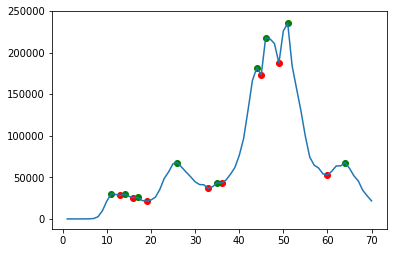

In [114]:
plt.scatter(seven_day_avg.index, seven_day_avg['min'], c='red')
plt.scatter(seven_day_avg.index, seven_day_avg['max'], c='green')
seven_day_avg.new_case.plot()

In [116]:
seven_day_avg['max'].unique()

array([            nan,  30259.14285714,  29657.14285714,  25794.85714286,
        67654.57142857,  43561.85714286, 181770.14285714, 217788.42857143,
       235067.85714286,  67772.71428571])

In [117]:
seven_day_avg['min'].unique()

array([            nan,  28224.        ,  25583.57142857,  21318.42857143,
        36571.42857143,  42877.28571429, 173208.14285714, 187226.57142857,
        52708.28571429])

In [124]:
seven_day_avg['new_case'].iat[-1]

21659.0

In [143]:
total_case_time['new_case'].rolling(7).mean()

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6      231556.142857
7      252931.571429
8      249573.714286
9      248321.571429
10     246957.142857
11     241556.285714
12     235067.857143
13     225714.428571
14     215398.428571
15     211585.000000
16     207326.714286
17     199085.714286
18     188863.285714
19     183900.571429
20     179841.428571
21     146798.857143
22     145989.000000
23     123887.000000
24     126204.571429
25     104014.285714
26      94794.428571
27      67470.714286
28      85522.142857
29      58978.571429
           ...      
463    173208.142857
464    185611.285714
465    195592.714286
466    204315.857143
467    207910.428571
468    212532.285714
469    216903.142857
470    217788.428571
471    215503.142857
472    218318.142857
473    218778.142857
474    218769.571429
475    219743.714286
476    215493.714286
477    216310.142857
478    218585.714286
479    215919

In [144]:
len(total_case_time)

493